# stack 
물건을 쌓아 올리듯 자료를 쌓아 올린 형태의 자료구조

선형 구조를 갖는다. (자료 간의 관계가 1대1의 관계를 갖는다.)

### 특성: 후입선출(LIFO:Last_in_first_out) 

### 스택에 필요한 자료구조와 연산
- 자료구조: 자료를 선형으로 저장할 저장소
  - 배열을 사용
  - 마지막에 삽입된 원소의 위치를 top이라고 한다. 

- 연산
  - 삽입:저장소에 자료를 저장.(push)
  - 삭제:자료를 꺼낸다.(pop)
  - 스택이 공백인지 아닌지 확인(isEmpty)
  - 스택의 top에 있는 item을 반환(peek)
  
### push 알고리즘
- append 메소드를 통해서 리스트의 마지막에 데이터를 삽입 
  ``` def push (item):
        s.append(item)
  ```
  



In [1]:
def push(item, size):
    global top
    top +=1
    if top == size:
        print('overflow!')
    else:
        stack[top]=item

size = 10
stack=[0]*size
top = -1

push(10,size)
top +=1
stack[top]=20 


### pop 알고리즘 
- pop을 할때 아무것도 넣지않으면 그냥 pop을 하고 맨 앞에 꺼를 꺼낼때는 0을 넣는다. [pop()안에 ]

- stack 안에 아무것도 없는데 pop을 하면 underflow 오류가 나온다. 

In [2]:
STACK_SIZE =10
stack = [0]*STACK_SIZE
top =-1

top +=1 #push(1)
stack[top]=1
top +=2 #push(2)
stack[top]=2
top +=3 #push(3)
stack[top]=3

top-= 1 #pop()
print(stack[top+1])
print(stack[top])
top -= 1
print(stack[top])
top -=1

3
0
0


## 스택의 응용(괄호검사)
- 괄호의 종류:대괄호, 중괄호, 소괄호

- 조건
  - 왼쪽 괄호의 개수와 오른쪽 괄호의 개수가 같아야한다. 
  - 같은 괄호에서 왼쪽 괄호는 오른쪽 괄호보다 먼저 나와야한다. 
  - 괄호 사이에는 포함 관계만 존재한다. 

### 스택의 응용(function call)

* 프로그램에서의 함수호출과 복귀에 따른 수행 순서를 관리 
  * 가장 마지막에 호출된 함수가 가장 먼저 실행을 완료하고 복귀하는 후입선출 구조이므로, 후입선출 구조의 스택을 이용하여 수행순서 관리 

In [3]:
def f2(c,d):
    return c-d

def f1(a,b):
    c=a+b
    d=10
    return f2(c,d)

a=10
b=20

print(f1(a,b))

20


### 재귀호출 


In [4]:
def f(n):
    global cnt

    if n==1 :
        return 1 
    else:
        f(n-1)
    
cnt=0
f(1000)
print(cnt)

0


In [5]:
def f(i,N):
    if i ==N:
        return
    else:
        print(arr[i])
        f(i+1, N)
        return
arr=[1,2,3]
N=3


배열에 v가 있으면 1, 없으면 0을 리턴


# Memoization
* 피보나치 수를 재귀함수로 구현하면 중복 호출을 해야한다.
 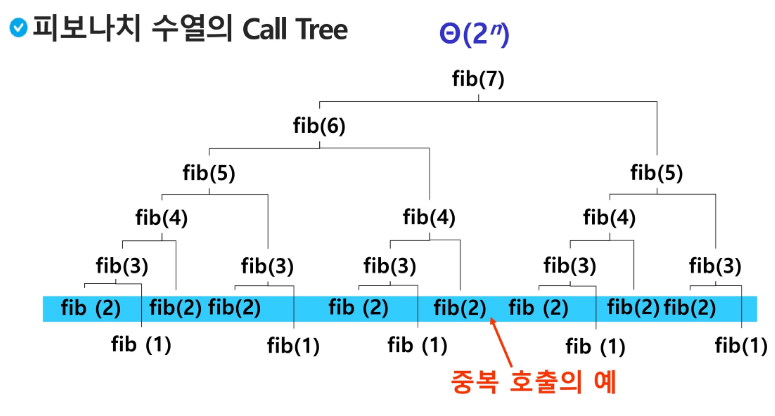 


- 메모이제이션은 이전에 계산한 값을 메모리에 저장해서 다시 계산하지 않도록 하여 실행속도를 빠르게 하는 기술. 
- 재귀함수로 피보나치를 쓰면 시간 복잡도가 2^n, 계산하자마자 저장하면 n으로 줄일 수 있다. 

In [6]:
def fibo1(n):
    # global memo
    if n>=2 and memo[n]==0:
        memo[n] = fibo1(n-1) + fibo1(n-2) 
    return memo[n]
# def fibo(n):
#     if n<2:
#         return n 
#     else:
#         return fibo(n-1) + fibo(n-2)
       
n=4
memo = [0] * (n+1)
memo[0] = 0
memo[1] = 1
print(fibo1(n))

3


# DP (독적 계획법)
- 최적화 문제를 해결하는 알고리즘
- 입력 크기가 작은 문제들을 모두 해결하고 그 해들을 이용하여 큰 크기의 부분 문제들을 해결하여 최종적으로 원래 주어진 입력의 문제를 해결하는 알고리즘. 

# DFS
- 비선형구조인 그래프 구조는 그래프로 표현된 모든 자료구조를 빠짐없이 검색 
하는게 중요
- 깊이 우선 탐색이다.
- 탐색->갈림길->하나를 선택해서 탐색
- 

In [7]:
'''
7 8
1 2 1 3 2 4 2 5 4 6 5 6 6 7 3 7
'''
def DFS(s, V):          # s 시작정점, V 정점개수(1번부터인 정점의 마지막정점)
    visited = [0]*(V+1) # 방문한 정점을 표시
    stack =[]           # 스택생성 
    visited[s] = 1      # 시작정점 방문표시
    v = s
    while True:
        for w in adjL[v]:   # v에 인접하고, 방문안한 w가 있으면 
            if visited[w]:
                stack.append(v) # push(v) 현재 정점을 push하고  
                v = w           # w에 방문
                visited[w]     # w에 방문 표시
                break           # for w, 에 대한 break v부터 다시 탐색
            else:               #남은 인접정점이 없어서 break가 걸리지 않은 경우 
                if stack: # 이전 갈림길을 스택에서 꺼내서... if TOP > -1
                    v = stack.pop()
                else:           # 되돌아갈 곳이 없으면 남은 갈림길이 없으면
                    break         # 탐색종료  







T=int(input())

for tc in range(1,T+1):
    V,E = map(int, input().split())
    adjL=[[] for _ in range(V+1)]
    arr = list(map(int, input().split()))
    for i in range(E):
        v1, v2 = arr[i*2],arr[i*2+1]
        adjL[V1].append(v2)
        adjL[v2].append(v1)
    print(adjL)


KeyboardInterrupt: Interrupted by user

# stack2

## 계산기
- 중위 표기법에서 후위 표기법으로 변환 알고리즘 (스택 이용)
- 

# 백트래킹

* 백트래킹은 해를 찾는 동중에 '막히면' 되돌아가서 다시 해를 찾는 기법
* 백트래킹 기법은 최적화와 결정문제를 해결할 수 있다. 

* 결정 문제: 문제의 조건을 만족하는 해가 존재하는지의 여부를 'yes' 또는 'no가 답하는 문제 
  * 미로찾기
  * n-Queen문제
  * Map coloring
  * 부분 집합의 합 문제 

### 백트래킹과 깊이 우선탐색과의 차이
- 어떤 노드에서 출발하는 경로가 해결책으로 이어질 것 같지 않으면 더 이상 그 경로를 따라가지 않음으로써 시도의 횟수를 줄인다. (Prunning 가지치기)
- 깊이우선탐색이 모든 경로를 추적하는데 입해 백트래킹은 불필요한 경로를 조기에 차단한다. 
- 깊이우선탐색을 가하기에는 경우의 수가 너무나 많다. 즉, N!가지의 경우의 수를 가진 문제에 대해 깊이우선탐색을 가하면 당연히 처리 불가능한 문제다. 
- 백트래킹 알고리즘을 적용하면 일반적으로 경우의 수가 줄어들지만 이 역시 최악의 경우에는 여전히 지수함수 시간을 요하므로 처리 불가능하다. 

### 백트래킹 기법
- 어떤 노드의 유망성을 점검한 후에 유망하지 않다고 결정되면 그 노드의 부모로 되돌아가 다음 자식 노드로 간다. 
- 어떤 노드를 방문하였을 때 그 노드를 포함한 경로가 해답이 될 수 없으면 그 노드는 유망하지 않다고 하며 , 그 반대로 해답의 가능성이 있따면 유망하다고 한다.
- 

In [ ]:
path = []

def KFC(x):
    if x == 2:
        # 정점 노드에 도달했을때 출력
        print(path)
        return
    
    for i in range(3):
        # 재귀호출을 하기 직전에 path리스트에 기록한다. 
        path.append(i)
        KFC(x + 1)
        # 함수가 리턴되고 되돌아오자마자 기록을 삭제 
        path.pop()

KFC(0)


[0, 0]
[0, 1]
[0, 2]
[1, 0]
[1, 1]
[1, 2]
[2, 0]
[2, 1]
[2, 2]


In [ ]:
path = []

def KFC(x):
    if x==3:
        print(path)
        return
    else:
        for i in range(1,7):
            path.append(i)
            KFC(x+1)
            path.pop()
KFC(0)

: 

중복을 취급하지 않는 "순열" 구현방법
1.중복순열 코드를 작성한다.
2.중복을 제거하는 코드를 추가하면 순열 코드가 된다. 


In [8]:
path = []
used=[0,0,0]
def KFC(x):
    if x == 2:
        # 정점 노드에 도달했을때 출력
        print(path)
        return
    
    for i in range(3):
        # 이미 사용을 한 숫자(path)인지 아닌지 구분하는 코드 
        #만약 이미 사용한 숫자인 경우 재귀호출을 생략 
        # 재귀호출을 하기 직전에 path리스트에 기록한다. 
        if used[i] == 1:
            continue
        # 처음 사용하는 숫자(흔적)이라면 used에 기록 
        used[i] = 1
        path.append(i)
        KFC(x + 1)
        # 함수가 리턴되고 되돌아오자마자 기록을 삭제 
        path.pop()
        # 모든 처리가 끝나고 돌아왔다면, used배열의 기록을 지워준다. 
        used[i] = 0
KFC(0)

[0, 0]
[0, 1]
[0, 2]
[1, 0]
[1, 1]
[1, 2]
[2, 0]
[2, 1]
[2, 2]
